In [ ]:
!pip install wordcloud wikipedia

!pip install matplotlib


  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=49465ae5e317e9dff32179da5ce89bc0307c7906ef7371203f2f0c36dfd5342a
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [ ]:
import wikipedia

import matplotlib.pyplot as plt

from wordcloud import WordCloud,STOPWORDS

In [ ]:
# 한글 폰트 설치 및 적용
# fc-cache: succeeded 확인 후 [런타임 다시 시작] 할 것.
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 0s (20.9 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 120882 files and direc

In [ ]:
import pandas as pd

df = pd.read_csv('부산온도1998.csv',encoding = 'cp949')
df.head()

,지점,지점명,일시,지면온도(°C)
0,159,부산,1998-01-01 03:00,3.8
1,159,부산,1998-01-01 09:00,5.1
2,159,부산,1998-01-01 15:00,18.0
3,159,부산,1998-01-01 21:00,3.1
4,159,부산,1998-01-02 03:00,1.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        24 non-null     int64  
 1   지점명       24 non-null     object 
 2   일시        24 non-null     object 
 3   지면온도(°C)  24 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 896.0+ bytes


In [ ]:
df2 = df.fillna(method='ffill')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지점        24 non-null     int64  
 1   지점명       24 non-null     object 
 2   일시        24 non-null     object 
 3   지면온도(°C)  24 non-null     float64
dtypes: float64(1), int64(1), object(2)
memory usage: 896.0+ bytes


In [ ]:
df2.rename(columns={'평균기온(°C)':'평균기온'},inplace = True)
df2.rename(columns={'최고기온(°C)':'최고기온'},inplace = True)
df2.rename(columns={'최저기온(°C)':'최저기온'},inplace = True)
df2.head(3)

,지점,지점명,일시,지면온도(°C)
0,159,부산,1998-01-01 03:00,3.8
1,159,부산,1998-01-01 09:00,5.1
2,159,부산,1998-01-01 15:00,18.0


KeyError: ignored

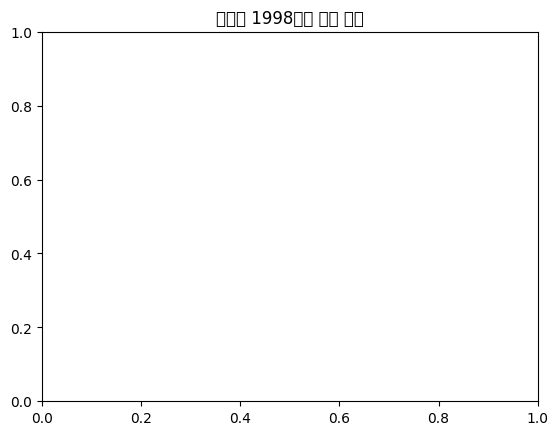

In [ ]:
import matplotlib.pyplot as pit

pit.rc('font',family = 'NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

plt.title('부산시 1998년도 기온 변화')

plt.plot(range(1,len(df2)+1),df2['최고기온'],label = '최고기온',c='r')
plt.plot(range(1,len(df2)+1),df2['최저기온'],label = '최저기온',c='b')
plt.plot(range(1,len(df2)+1),df2['평균기온'],label = '평균기온',c='g')


plt.title('1998년 부산시 기온 변화')
plt.xlabel('날짜')
plt.ylabel('기온')

plt.legend()

plt.show()

plt.savefig('1998년부산기온.png')
